# <center>Food Classification from Images Using Convolutional Neural Networks</center>

## Food Classification using keras
<br/>
<div style="text-align: justify">
Convolutional neural networks (CNN) have been widely used in automatic image classification systems. In most cases, features from the top layer of the CNN are utilized for classification; however, those features may not contain enough useful information to predict an image correctly. In some cases, features from the lower layer carry more discriminative power than those from the top. Therefore, applying features from a specific layer only to classification seems to be a process that does not utilize learned CNN’s potential discriminant power to its full extent. This inherent property leads to the need for fusion of features from multiple layers. To address this problem, we propose a method of combining features from multiple layers in given CNN models. Moreover, already learned CNN models with training images are reused to extract features from multiple layers. The proposed fusion method is evaluated according to image classification benchmark data sets, CIFAR-10, NORB, and SVHN. In all cases, we show that the proposed method improves the reported performances of the existing models by 0.38%, 3.22% and 0.13%, respectively.
</div>

### Convolutional Neural Networks
<br/>
<div style="text-align: justify">
The Convolutional neural network(CNN) is a deep learning architecture that has numerous application in computer vision and natural language processing. The CNN classifies objects based on number of features matched.

Steps involed in creating CNN
    <ol>
<li>Convolution</li>
<li> Pooling</li>
<li> Flattening</li>
<li> Full Connection</li>
    </ol>
</div>

 ![Dataset](convo.png)

<ul>
    <li><b>Convolution</b>
<br/>
<div style="text-align: justify">
ConvNets derive their name from the “convolution” operator. The primary purpose of Convolution in case of a ConvNet is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data. 
</div>
    </li>
<li> <b>Pooling</b>
<br/>
<div style="text-align: justify">
Spatial Pooling (also called subsampling or downsampling) reduces the dimensionality of each feature map but retains the most important information. Spatial Pooling can be of different types: Max, Average, Sum etc.
In case of Max Pooling, we define a spatial neighborhood (for example, a 2×2 window) and take the largest element from the rectified feature map within that window. Instead of taking the largest element we could also take the average (Average Pooling) or sum of all elements in that window. In practice, Max Pooling has been shown to work better.
</div>
    </li>
<li> <b>Flattening</b>
<br/>
<div style="text-align: justify">
Convert the 2D matrix to a column vector so that it can passed through an artificial neural network
</div>
    </li>
<li> <b>Full Connection</b>
<br/>
<div style="text-align: justify">
The Fully Connected layer is a traditional Multi Layer Perceptron that uses a softmax activation function in the output layer (other classifiers like SVM can also be used, but will stick to softmax in this post). The term “Fully Connected” implies that every neuron in the previous layer is connected to every neuron on the next layer.
The output from the convolutional and pooling layers represent high-level features of the input image. The purpose of the Fully Connected layer is to use these features for classifying the input image into various classes based on the training dataset. 
</div>
    </li>
   </ul>

## Implementation of Food Classification using keras

First we need to import the libraries required by the application

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator   
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Dataset

The dataset is located in folder named dataset.

The data consists of three classes, french_fries, pizza and samosa.

<img src = "dataset.png" alt = "DataSet" />

Each folder contains approximately 1000 image files in each category. The name of the folder is actually the label of those files.

In [13]:
#Initialize the CNN
classifier = Sequential()
#Convolution and Max pooling
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [14]:
#Flatten
classifier.add(Flatten())

In [15]:
#Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(3, activation = 'softmax'))

In [16]:
#Compile classifier
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
#Fitting CNN to the images
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True) 
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('./dataset/training_set', target_size=(128, 128), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory('./dataset/test_set', target_size=(128, 128), batch_size=32, class_mode='categorical')
classifier.fit_generator(training_set, steps_per_epoch=800/32, epochs=50, validation_data=test_set, validation_steps = 200/32)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Epoch 1/50
25/25 [==============================] - 21s 840ms/step - loss: 1.1524 - acc: 0.3637 - val_loss: 1.0882 - val_acc: 0.4152
Epoch 2/50
25/25 [==============================] - 19s 776ms/step - loss: 1.0667 - acc: 0.4000 - val_loss: 1.0003 - val_acc: 0.4330
Epoch 3/50
25/25 [==============================] - 19s 755ms/step - loss: 0.9971 - acc: 0.4838 - val_loss: 0.9292 - val_acc: 0.5231
Epoch 4/50
25/25 [==============================] - 19s 768ms/step - loss: 0.9371 - acc: 0.5325 - val_loss: 0.8440 - val_acc: 0.5893
Epoch 5/50
25/25 [==============================] - 19s 770ms/step - loss: 0.9337 - acc: 0.5212 - val_loss: 0.8720 - val_acc: 0.5536
Epoch 6/50
25/25 [==============================] - 19s 760ms/step - loss: 0.8464 - acc: 0.5712 - val_loss: 0.9897 - val_acc: 0.4769
Epoch 7/50
25/25 [==============================] - 18s 740ms/step - loss: 0.9147 - acc: 0.5425 - val_loss: 1.0030 - va

In [11]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'french_fries', 1: 'pizza', 2: 'samosa'}

In [12]:
#save model
import os
target_dir = './models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
classifier.save('./models/model.h5')
classifier.save_weights('./models/weights.h5')

### Predicting a new image from url

Importing libraries for creating GUI 

In [19]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model
from PIL import Image, ImageTk
import requests
from io import BytesIO
import IPython
from keras.preprocessing import image as image_utils

<div align="justify">
    We now create a url and a button for browsing and loading image.
The trained CNN is loaded and the saved parameters are restored.
Prediction is made on the new image which is then output and 
the output is displayed on canvas.
    </div>

In [11]:
#load model
img_width, img_height = 128, 128
model_path = './models/model.h5'
model_weights_path = './models/weights.h5'
model = load_model(model_path)
model.load_weights(model_weights_path)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


https://www.kingarthurflour.com/sites/default/files/recipe_legacy/20-3-large.jpg
Predicted answer : pizza


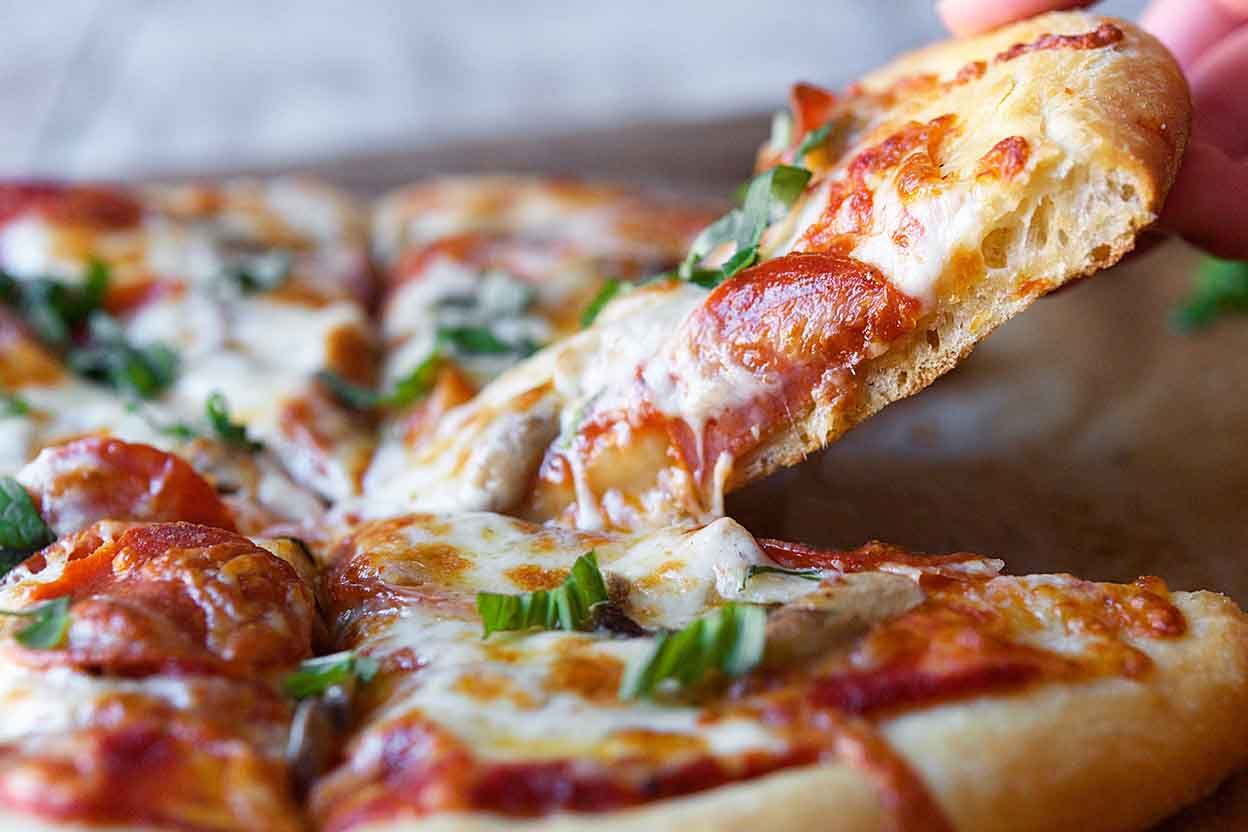

In [21]:
url = 'https://www.kingarthurflour.com/sites/default/files/recipe_legacy/20-3-large.jpg' # change to image url
print(url)
response = requests.get(url)
test_image = Image.open(BytesIO(response.content))
put_image = test_image.resize((400,400)) 
test_image = test_image.resize((128,128))  
test_image = image_utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict_on_batch(test_image)

# if result[0][0] == 1:
#     ans = 'french fries'
# elif result[0][1] == 1:
#     ans = 'pizza'
# elif result[0][2] == 1:
#     ans = 'samosa'

for i in range(len(result[0])):
    if result[0][i] == 1:
        ans = labels[i]
    
print('Predicted answer : ' +  ans)
IPython.display.Image(url, width = 500)

### Conclusion

<br/>
<div style="text-align: justify">
The performance of the system is high, and is considered
acceptable from a usage point of view. However, the CNNs
need high-performance computing machines in order to
experiment on the huge multi-media datasets. The CNN
is capable of train highly non-linear data, and for that in contrast, it takes more computational time to train the network.
However, the performance matters a lot, and once the system
is properly trained, the system can produce the results in less
time. The images are properly preprocessed and all kinds of
images are tested with CNN. From this, it is concluded that
CNNs are more suitable for classifying the images when the
number of classes are more.
The task of image classification can be extended using
prominent features that can categorize food images. Since
the CNNs are consuming high computational time, the
feature-based approach is highly appreciable. A multi-level
classification approach (hierarchical approach) is suitable to
avoid mis-classifications when the number of classes is more.
Moreover, a dataset containing all food categories is also not
available in the literature yet.
</div>

### 4.6 References

[1] http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&amp;arnumber=8228338
<br>
[2] https://keras.io/
<br>
[3] https://www.tensorflow.org/